In [4]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=9b74246790630720597146a6445bea91c4ce8d1043bbaf32a85fbfa70a829477
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [5]:
! pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/MedMNIST/PneumoniaMNIST.git
!cd PneumoniaMNIST

In [ ]:
! pip install --upgrade git+https://github.com/MedMNIST/MedMNIST.git

In [6]:
import medmnist
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [7]:
from medmnist import PneumoniaMNIST
dataset = PneumoniaMNIST(split="train", download=True)


100%|██████████| 4170669/4170669 [00:00<00:00, 5354384.83it/s]


In [8]:
# Ruta al archivo .npz
ruta_archivo = '/content/pneumoniamnist.npz'

# Carga el archivo .npz
archivo_npz = np.load(ruta_archivo)


print("Nombres de los arrays en el archivo:", archivo_npz.files)

train_images = archivo_npz['train_images']
val_images = archivo_npz['val_images']
test_images = archivo_npz['test_images']
train_labels = archivo_npz['train_labels']
val_labels = archivo_npz['val_labels']
test_labels = archivo_npz['test_labels']


Nombres de los arrays en el archivo: ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


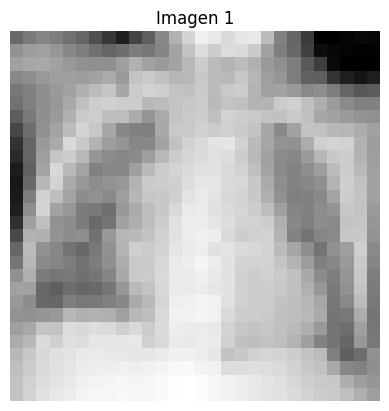

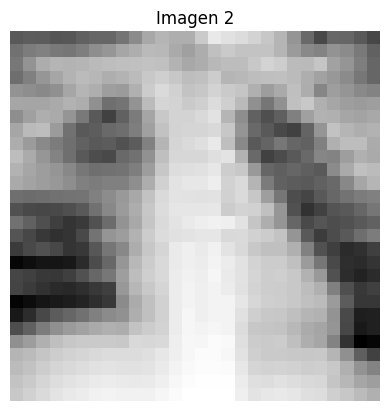

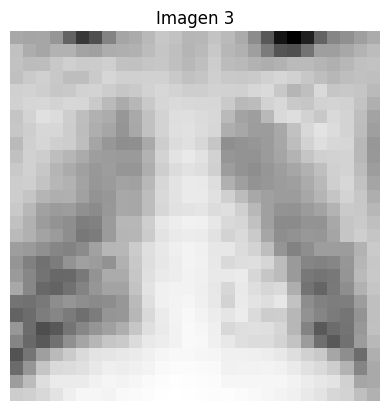

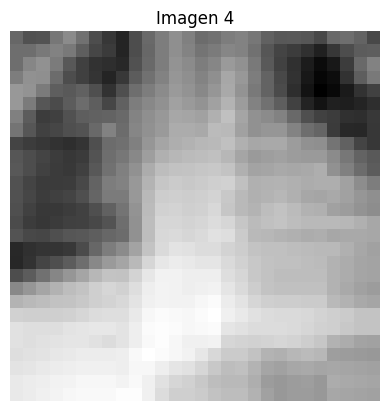

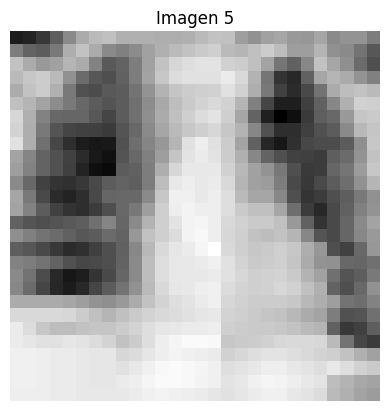

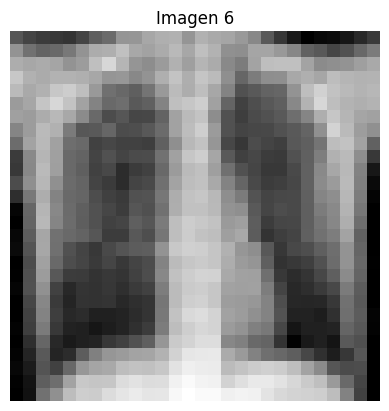

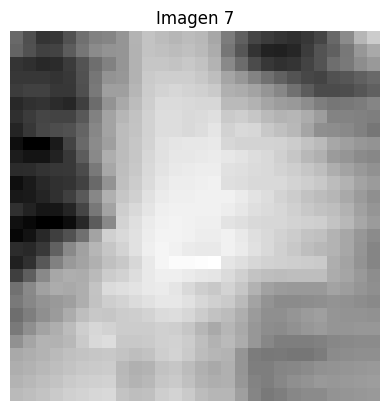

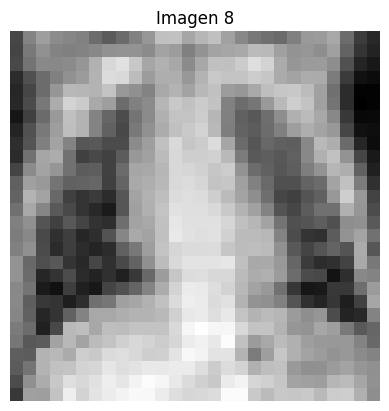

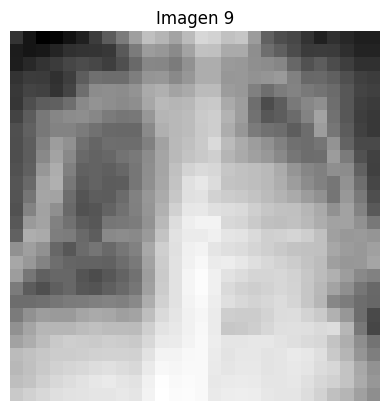

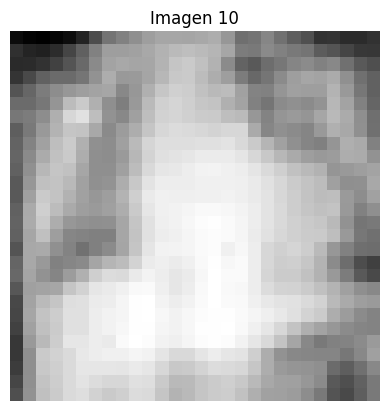

In [ ]:
for i in range(10):
    imagen = train_images[i]
    plt.imshow(imagen, cmap='gray')
    plt.title(f'Imagen {i+1}')
    plt.axis('off')
    plt.show()

In [ ]:
print("Train Labels:", train_labels)
print("Validation Labels:", val_labels)
print("Test Labels:", test_labels)


In [ ]:
train_images.shape

(4708, 28, 28)

In [ ]:
val_images.shape

(524, 28, 28)

In [ ]:
test_images.shape

(624, 28, 28)

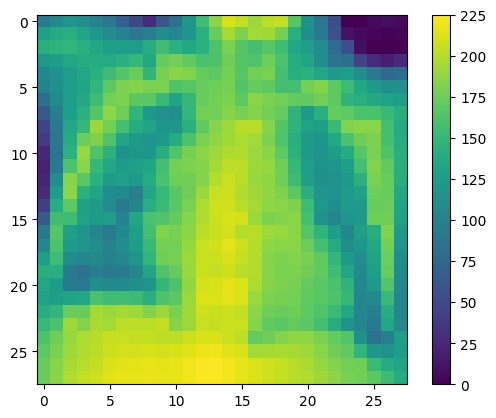

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Primer modelo y compilacion

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])
model1.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
from sklearn import metrics
from keras.engine.training import optimizer
#Segundo modelo experimental y compilacion

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(60,activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
    ])
model2.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',
               metrics = ['MSE'])

In [ ]:
#Modelo con arquitectura correcta y compilacion correcta para este trabajo

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(val_images,val_labels))

Epoch 1/50
148/148 [==============================] - 1s 5ms/step - loss: 0.6767 - accuracy: 0.7421 - val_loss: 0.6047 - val_accuracy: 0.7424
Epoch 2/50
148/148 [==============================] - 1s 5ms/step - loss: 1.1220 - accuracy: 0.7421 - val_loss: 4.1162 - val_accuracy: 0.7424
Epoch 3/50
148/148 [==============================] - 1s 5ms/step - loss: 0.7414 - accuracy: 0.7421 - val_loss: 0.8652 - val_accuracy: 0.7424
Epoch 4/50
148/148 [==============================] - 1s 5ms/step - loss: 0.5730 - accuracy: 0.7421 - val_loss: 0.4690 - val_accuracy: 0.7424
Epoch 5/50
148/148 [==============================] - 1s 3ms/step - loss: 0.4502 - accuracy: 0.7421 - val_loss: 0.3628 - val_accuracy: 0.7424
Epoch 6/50
148/148 [==============================] - 1s 4ms/step - loss: 0.3282 - accuracy: 0.7421 - val_loss: 0.3601 - val_accuracy: 0.7424
Epoch 7/50
148/148 [==============================] - 1s 4ms/step - loss: 0.3907 - accuracy: 0.7421 - val_loss: 0.3172 - val_accuracy: 0.7424
Epoch 

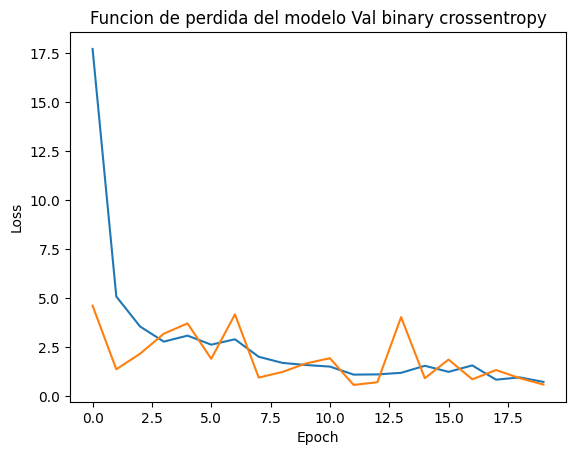

In [ ]:
# Plot loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida del modelo Val binary crossentropy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

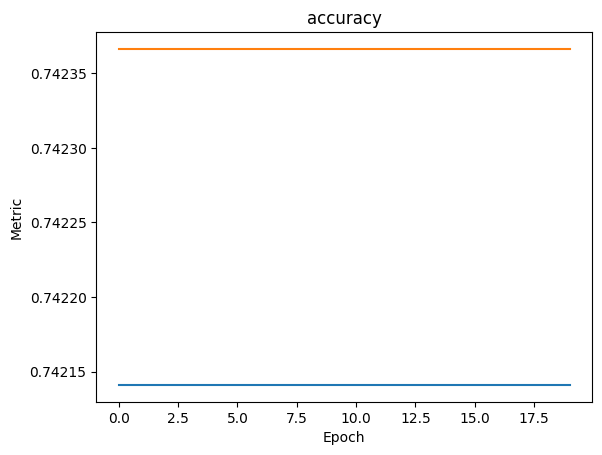

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.show()

In [ ]:
predictions = model.predict(test_images)

20/20 [==============================] - 0s 1ms/step


In [ ]:
predictions[0]

array([1.], dtype=float32)

In [ ]:
np.argmax(predictions[0])
class_names=0,1

In [ ]:
# Realiza predicciones en los datos de validación
predictions = model.predict(val_images)

# Obtiene las etiquetas predichas para cada instancia
predicted_labels = np.argmax(predictions, axis=1)

# Imprime las etiquetas predichas
print(predicted_labels)

17/17 [==============================] - 0s 2ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

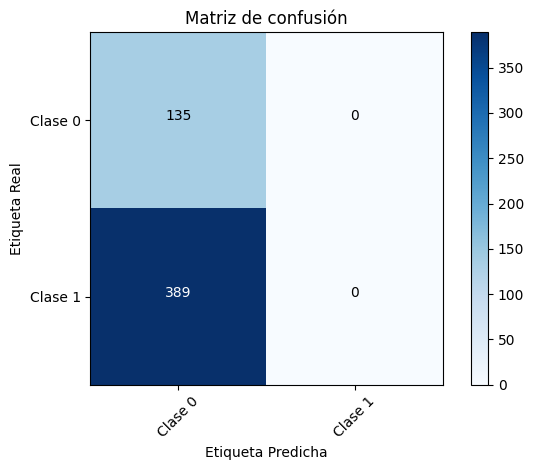

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes las etiquetas reales y las predicciones de tu red neuronal
y_real = val_labels
y_pred = predicted_labels

# Calcula la matriz de confusión
cm = confusion_matrix(y_real, y_pred)

# Define las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crea la representación gráfica de la matriz de confusión
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Añade los valores en cada celda de la matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Accuracy')

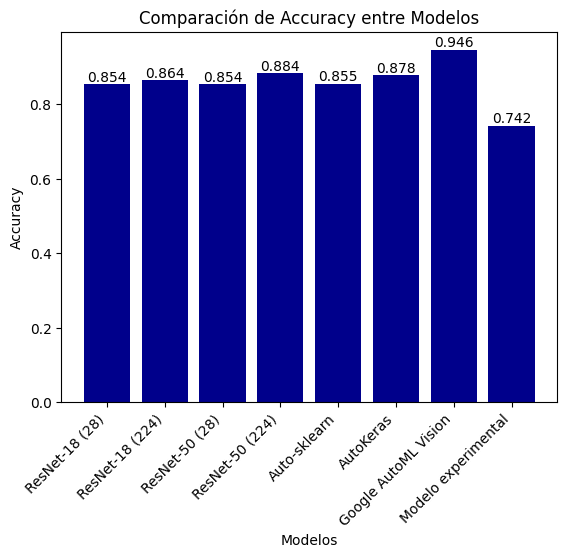

In [ ]:
import matplotlib.pyplot as plt

acurracy_modelos = [0.854,0.864,0.854,0.884,0.855,0.878,0.946,0.742]

# Graficar los valores de accuracy de cada modelo
model_names = ['ResNet-18 (28)', 'ResNet-18 (224)', 'ResNet-50 (28)', 'ResNet-50 (224)', 'Auto-sklearn', 'AutoKeras', 'Google AutoML Vision', 'Modelo experimental']
bar_color = 'darkblue'
plt.bar(model_names, acurracy_modelos,color=bar_color)
for i in range(len(model_names)):
    plt.text(i, acurracy_modelos[i], str(acurracy_modelos[i]), ha='center', va='bottom')


# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.title('Comparación de Accuracy entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')

In [ ]:
!pip install torch torchvision


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from PIL import Image
import numpy as np
ruta_archivo = '/content/pneumoniamnist.npz'
archivo_npz = np.load(ruta_archivo)

# Cargar las imágenes desde el archivo NPZ
train_images = archivo_npz['train_images']

# Crear una lista para almacenar las imágenes redimensionadas
resized_images = []
resized_val = []

# Redimensionar cada imagen y agregarla a la lista
for imagen in train_images:
    imagen = Image.fromarray(imagen)
    imagen = imagen.resize((224, 224)) 
    imagen = imagen.convert('RGB') # Redimensionar a 224x224 píxeles
    imagen_array = np.array(imagen)
    resized_images.append(imagen_array)

# Convertir la lista de imágenes redimensionadas a un arreglo numpy
resized_images = np.array(resized_images)

val_images = archivo_npz['val_images']
for imagen in val_images:
    imagen = Image.fromarray(imagen)
    imagen = imagen.resize((224, 224)) 
    imagen = imagen.convert('RGB') # Redimensionar a 224x224 píxeles
    imagen_array = np.array(imagen)
    resized_val.append(imagen_array)

resized_images = np.array(resized_images) / 255.0
resized_val = np.array(resized_val) / 255.0

In [19]:
train_labels = archivo_npz['train_labels']
val_labels = archivo_npz['val_labels']
test_labels = archivo_npz['test_labels']

In [6]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Cargar el modelo ResNet50 sin la capa completamente conectada (top)
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Congelar los pesos del modelo base
base_model.trainable = False

# Agregar una nueva capa completamente conectada como salida
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='softmax')(x)  # Clasificación binaria, salida con activación sigmoide

# Definir el nuevo modelo con la capa de salida agregada
model = Model(inputs=base_model.input, outputs=output)
# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(resized_images, train_labels, epochs=50, validation_data=(resized_val, val_labels), batch_size=32)



Epoch 1/50
148/148 [==============================] - 20s 114ms/step - loss: 0.5720 - accuracy: 0.7421 - val_loss: 0.6333 - val_accuracy: 0.7424
Epoch 2/50
148/148 [==============================] - 15s 104ms/step - loss: 0.5505 - accuracy: 0.7421 - val_loss: 0.5345 - val_accuracy: 0.7424
Epoch 3/50
148/148 [==============================] - 16s 106ms/step - loss: 0.5220 - accuracy: 0.7421 - val_loss: 0.4794 - val_accuracy: 0.7424
Epoch 4/50
148/148 [==============================] - 16s 106ms/step - loss: 0.5176 - accuracy: 0.7421 - val_loss: 0.4687 - val_accuracy: 0.7424
Epoch 5/50
148/148 [==============================] - 16s 107ms/step - loss: 0.4671 - accuracy: 0.7421 - val_loss: 0.4351 - val_accuracy: 0.7424
Epoch 6/50
148/148 [==============================] - 16s 107ms/step - loss: 0.4297 - accuracy: 0.7421 - val_loss: 0.3912 - val_accuracy: 0.7424
Epoch 7/50
148/148 [==============================] - 16s 107ms/step - loss: 0.3900 - accuracy: 0.7421 - val_loss: 0.4004 - val_ac

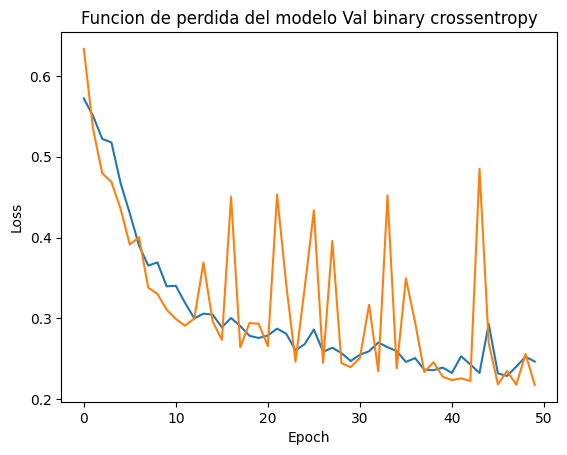

In [9]:
import matplotlib.pyplot as plt
# Plot loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida del modelo Val binary crossentropy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

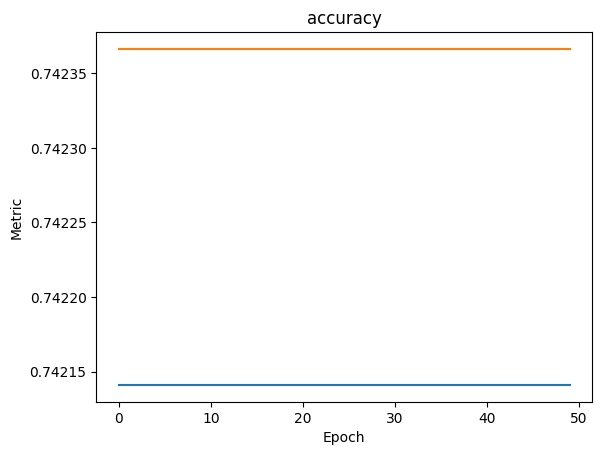

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.show()


In [17]:
test_images = archivo_npz['test_images']

test_imagenes = []
for imagen in test_images:
    imagen = Image.fromarray(imagen)
    imagen = imagen.resize((224, 224)) 
    imagen = imagen.convert('RGB') # Redimensionar a 224x224 píxeles
    imagen_array = np.array(imagen)
    test_imagenes.append(imagen_array)
resized_test = np.array(test_imagenes) / 255.0

predictions = model.predict(resized_test)
predictions[0]
# Obtiene las etiquetas predichas para cada instancia
predicted_labels = np.argmax(predictions, axis=1)

# Imprime las etiquetas predichas
print(predicted_labels)

20/20 [==============================] - 2s 89ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

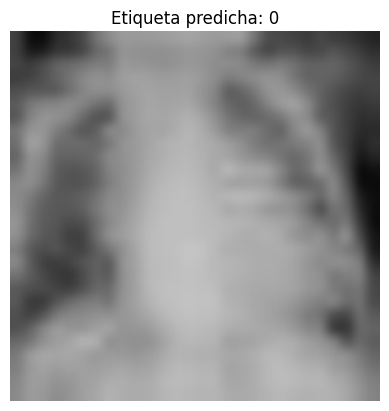

In [18]:

# Obtén la imagen original correspondiente a la predicción
imagen_prediccion = resized_test[0] * 255.0  # Revertir el escalado a [0, 255]
etiqueta_predicha = predicted_labels[0]

# Visualiza la imagen y la etiqueta predicha
plt.imshow(imagen_prediccion.astype(np.uint8))
plt.title('Etiqueta predicha: {}'.format(etiqueta_predicha))
plt.axis('off')
plt.show()
